In [200]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np

In [201]:
'''
función para graficar la frontera de decision de un modelo
Parámetros:
-modelo a usar para efectuar predicciones
-conjunto de vectores de características
-conjunto de etiquetas
'''
def graficar_frontera_decision(modelo, X, y):
    feature_1, feature_2 = np.meshgrid(
        np.linspace(np.min(X[:,0]), np.max(X[:,0])),
        np.linspace(np.min(X[:,1]), np.max(X[:,1])))

    grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

    pred = modelo.predict(grid)
    pred = np.reshape(pred, feature_1.shape)
    display = DecisionBoundaryDisplay(
        xx0=feature_1, xx1=feature_2, response=pred)
    display.plot()
    display.ax_.scatter(
        X[:, 0], X[:, 1], c=y, edgecolor="black"
    )
    plt.show()

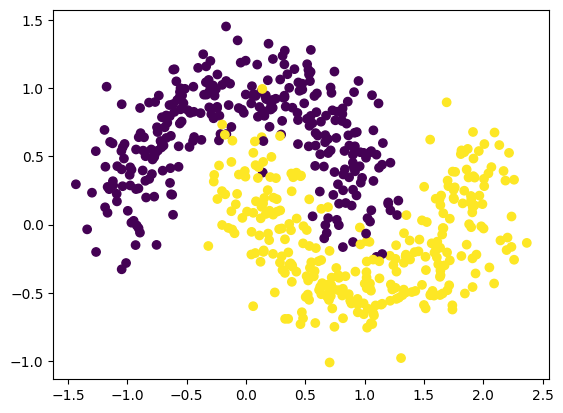

In [202]:
#carga del conjunto sintetico de datos
X,y = make_moons(n_samples=600, noise=0.20)

#grafica del conjunto de datos
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

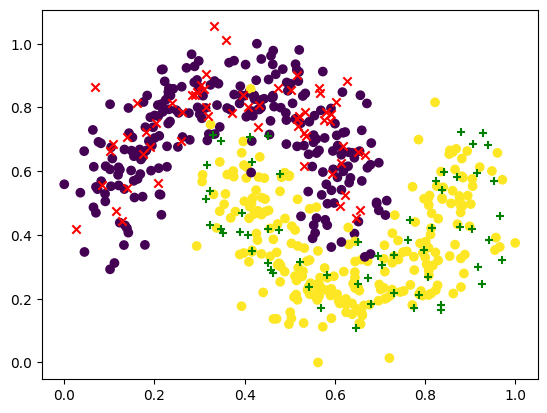

In [203]:
from sklearn.model_selection import train_test_split

#división del conjunto de datos 
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y)

#escalamiento del conjunto de datos
escalador = MinMaxScaler()
X_tr = escalador.fit_transform(X_tr)
X_te = escalador.transform(X_te)

#union de conjuntos de datos escalados entrenamiento y prueba (para graficar)
X_t = np.vstack((X_tr,X_te))
y_t = np.vstack((y_tr.reshape(-1,1),y_te.reshape(-1,1)))

#grafica del conjunto de datos escalados y dividos
plt.scatter(X_tr[:,0], X_tr[:,1], c = y_tr)
plt.scatter(X_te[y_te == 0,0], X_te[y_te == 0,1], marker='x', c = 'red')
plt.scatter(X_te[y_te == 1,0], X_te[y_te == 1,1], marker='+', c = 'green')
plt.show()

**PERCEPTRON**

In [204]:
from sklearn.linear_model import Perceptron

#Entrenamiento y prueba del algoritmo del perceptron de scikit learn
per.fit(X_tr, y_tr)

print(f'[Perceptron] Exactitud en Entrenamiento {per.score(X_tr, y_tr)}')
print(f'[Perceptron] Exactitud en Entrenamiento {per.score(X_te, y_te)}')

[Perceptron] Exactitud en Entrenamiento 0.8375
[Perceptron] Exactitud en Entrenamiento 0.8666666666666667


**POCKET ALGORITHM**

In [205]:
from sklearn.metrics import accuracy_score

class Percetron_Pocket_Algorithm:
    
    def __init__(self, epochs = 1000) -> None:
        self.w = None
        self.epochs = epochs
    
    #método para hacer inferencias
    def predict (self, X):
        rows = X.shape[0]
        ext = np.ones((rows, 1))
        eX = np.hstack((X, ext))
        y_hat = np.zeros(rows)

        for i, x in enumerate(eX):
            y_hat[i] = 1 if np.dot(x, self.w) >= 0 else 0

        return y_hat
    
    #método para calcular la exactitud
    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

    #método para entrenar el modelo
    def fit(self, X, y):        
        rows = X.shape[0]
        dim = X.shape[1] + 1            
        ext = np.ones((rows, 1))
        eXtr = np.hstack((X, ext))
        self.w = np.copy(np.random.uniform(low = 0, high = 1, size = dim))        
        ws = np.copy(self.w)
        h = accuracy_score(y, self.predict(X))
        hs = h

        for it in range(self.epochs):
            ord = np.random.choice(a = range(rows), size = rows, replace = False)
            chng = 0    
            for o in ord: 
                chk_flag = False
                dp = np.dot(eXtr[o], self.w)
                if y[o] == 1 and dp <= 0:
                    chng += 1
                    self.w += eXtr[o]
                    chk_flag = True
                elif y[o] == 0 and dp >= 0:
                    chng += 1
                    self.w -= eXtr[o]
                    chk_flag = True
                if chk_flag:
                    h = accuracy_score(y, self.predict(X))
                    if h > hs:
                        ws = np.copy(self.w)                        
                        hs = h
            if chng == 0:
                break
            
            self.w = np.copy(ws)  

In [206]:
#Entrenamiento y prueba del algoritmo del bolsillo para el perceptron
pal = Percetron_Pocket_Algorithm()
pal.fit(X_tr, y_tr)

print(f'[Pocket Alg] Exactitud en Entrenamiento {pal.score(X_tr, y_tr)}')
print(f'[Pocket Alg] Exactitud en Entrenamiento {pal.score(X_te, y_te)}')

[Pocket Alg] Exactitud en Entrenamiento 0.875
[Pocket Alg] Exactitud en Entrenamiento 0.875


**PERCEPTRON PARALELO**

In [207]:
'''
TODO
Implementar clasificador descrito en (Auer2008) A Learning Rule for Very Simple Universal Approximators Consisting of a Single Layer of Perceptrons
Se sugiere seguir la estructura de método fit para entrenar y predict para realizar inferencias para poder usar los métodos y funciones ya establecidos
Los hiperparametros del modelo deben poder ser definidos en el constructor del modelo
'''

class Perceptron_Paralelo:
    def __init__(self) -> None:
        pass
    
    def fit(self, X, y):
        pass
    
    #método para calcular la exactitud
    def score(self, X, y):
        return accuracy_score(y, self.predict(X))
    
    #método para hacer inferencias
    def predict(self, X):
        pass

In [208]:
#Entrenamiento y prueba perceptron paralelo
ppa = Perceptron_Paralelo()
ppa.fit(X_tr, y_tr)

print(f'[Pocket Alg] Exactitud en Entrenamiento {ppa.score(X_tr, y_tr)}')
print(f'[Pocket Alg] Exactitud en Entrenamiento {ppa.score(X_te, y_te)}')


InvalidParameterError: The 'y_pred' parameter of accuracy_score must be an array-like or a sparse matrix. Got None instead.

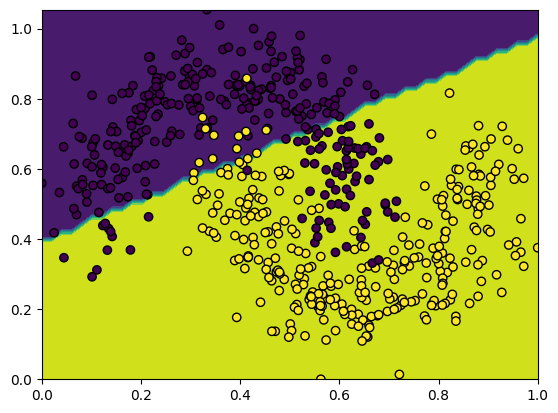

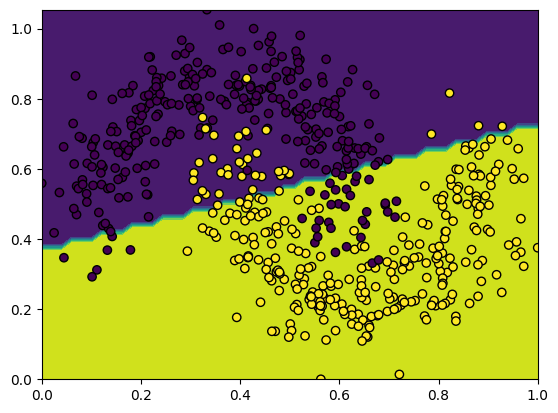

ValueError: cannot reshape array of size 1 into shape (50,50)

In [209]:
graficar_frontera_decision(per, X_t, y_t)
graficar_frontera_decision(pal, X_t, y_t)
graficar_frontera_decision(ppa, X_t, y_t)